<a href="https://colab.research.google.com/github/SALMA55ASHRAF/AI_instant_tasks/blob/master/sales_5000.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/5000 Sales Records.csv")

In [ ]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Central America and the Caribbean,Antigua and Barbuda,Baby Food,Online,M,12/20/2013,957081544,1/11/2014,552,255.28,159.42,140914.56,87999.84,52914.72
1,Central America and the Caribbean,Panama,Snacks,Offline,C,7/5/2010,301644504,7/26/2010,2167,152.58,97.44,330640.86,211152.48,119488.38
2,Europe,Czech Republic,Beverages,Offline,C,9/12/2011,478051030,9/29/2011,4778,47.45,31.79,226716.10,151892.62,74823.48
3,Asia,North Korea,Cereal,Offline,L,5/13/2010,892599952,6/15/2010,9016,205.70,117.11,1854591.20,1055863.76,798727.44
4,Asia,Sri Lanka,Snacks,Offline,C,7/20/2015,571902596,7/27/2015,7542,152.58,97.44,1150758.36,734892.48,415865.88


In [ ]:
df.shape

(5000, 14)

Text(0.5, 1.0, 'freq of each item')

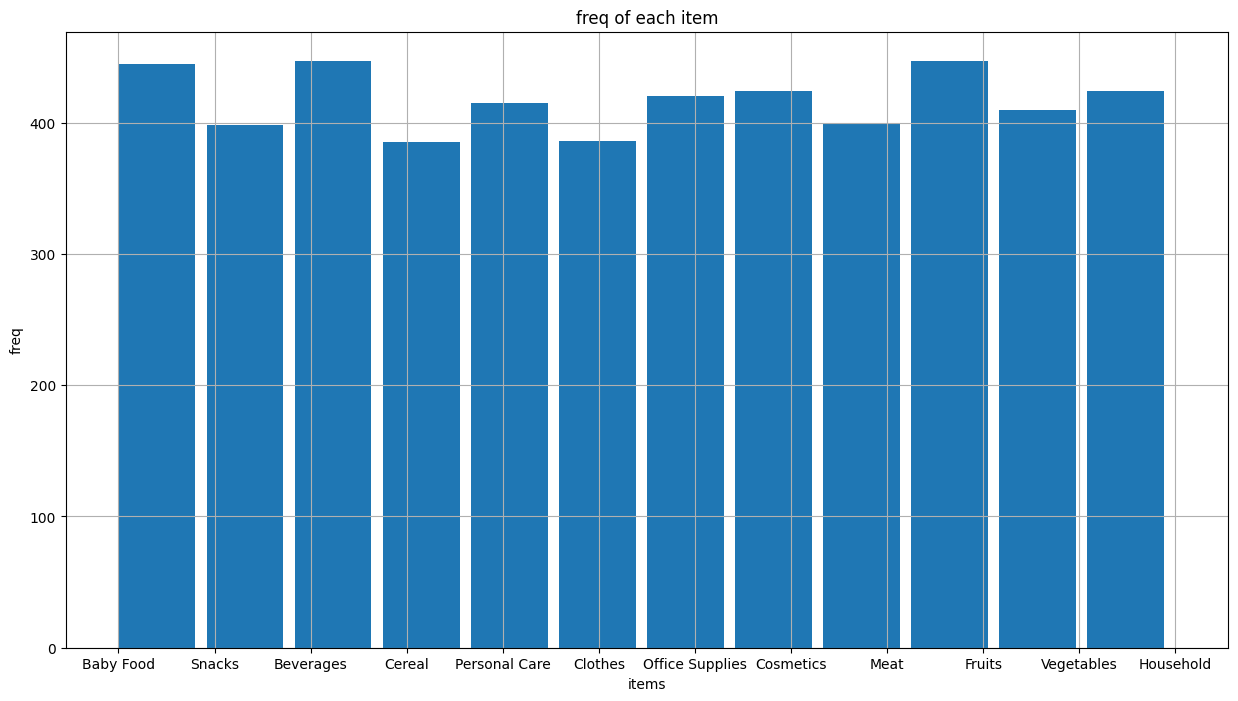

In [ ]:
plt.figure(figsize=[15,8])
df['Item Type'].hist(bins=12,width=0.8)
plt.xlabel("items")
plt.ylabel("freq")
plt.title("freq of each item")

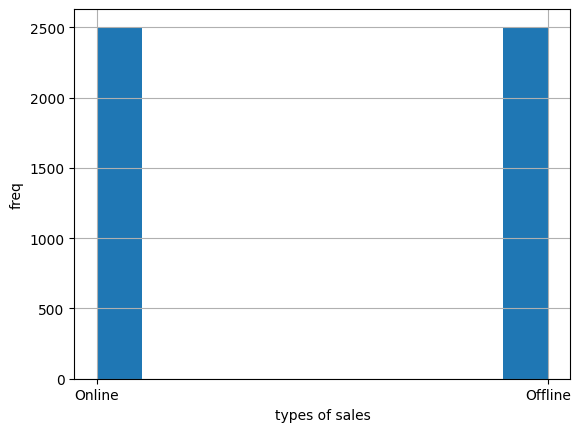

In [ ]:
df['Sales Channel'].hist()
plt.xlabel("types of sales")
plt.ylabel("freq");

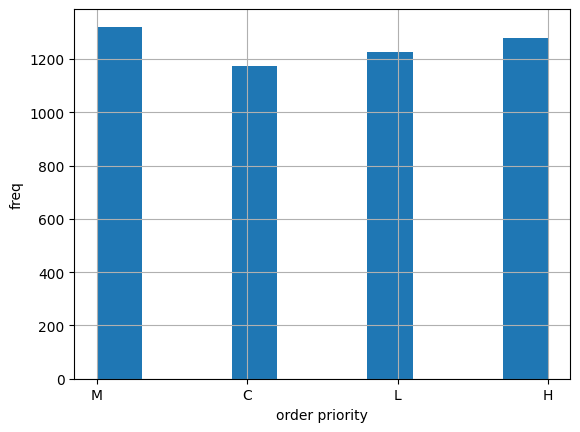

In [ ]:
df['Order Priority'].hist()
plt.xlabel("order priority")
plt.ylabel("freq");

In [ ]:
df.head(2)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Central America and the Caribbean,Antigua and Barbuda,Baby Food,Online,M,12/20/2013,957081544,1/11/2014,552,255.28,159.42,140914.56,87999.84,52914.72
1,Central America and the Caribbean,Panama,Snacks,Offline,C,7/5/2010,301644504,7/26/2010,2167,152.58,97.44,330640.86,211152.48,119488.38


In [ ]:
df.dtypes

Region             object
Country            object
Item Type          object
Sales Channel      object
Order Priority     object
Order Date         object
Order ID            int64
Ship Date          object
Units Sold          int64
Unit Price        float64
Unit Cost         float64
Total Revenue     float64
Total Cost        float64
Total Profit      float64
dtype: object

In [ ]:
df['Order Date']=pd.to_datetime(df['Order Date'])
df["Ship Date"]=pd.to_datetime(df["Ship Date"])

In [ ]:
df.dtypes

Region                    object
Country                   object
Item Type                 object
Sales Channel             object
Order Priority            object
Order Date        datetime64[ns]
Order ID                   int64
Ship Date         datetime64[ns]
Units Sold                 int64
Unit Price               float64
Unit Cost                float64
Total Revenue            float64
Total Cost               float64
Total Profit             float64
dtype: object

In [ ]:
df["time_to_get_ready"]=df['Ship Date']-df['Order Date']

In [ ]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,time_to_get_ready
0,Central America and the Caribbean,Antigua and Barbuda,Baby Food,Online,M,2013-12-20,957081544,2014-01-11,552,255.28,159.42,140914.56,87999.84,52914.72,22 days
1,Central America and the Caribbean,Panama,Snacks,Offline,C,2010-07-05,301644504,2010-07-26,2167,152.58,97.44,330640.86,211152.48,119488.38,21 days
2,Europe,Czech Republic,Beverages,Offline,C,2011-09-12,478051030,2011-09-29,4778,47.45,31.79,226716.10,151892.62,74823.48,17 days
3,Asia,North Korea,Cereal,Offline,L,2010-05-13,892599952,2010-06-15,9016,205.70,117.11,1854591.20,1055863.76,798727.44,33 days
4,Asia,Sri Lanka,Snacks,Offline,C,2015-07-20,571902596,2015-07-27,7542,152.58,97.44,1150758.36,734892.48,415865.88,7 days


In [44]:
df.groupby('Country')['Total Profit'].mean()

Country
Afghanistan     316354.312105
Albania         499557.429524
Algeria         266183.313929
Andorra         385250.915750
Angola          467969.596250
                    ...      
Vatican City    278861.843913
Vietnam         328029.741053
Yemen           362250.998182
Zambia          354489.316774
Zimbabwe        332153.008571
Name: Total Profit, Length: 185, dtype: float64

In [49]:
!pip install country_converter
from country_converter import CountryConverter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 1.3 MB/s eta 0:00:00


In [53]:
import country_converter as coco
df["iso3"]=coco.convert(names=df['Country'],to="ISO3")
df["iso3"]

0       ATG
1       PAN
2       CZE
3       PRK
4       LKA
       ... 
4995    NZL
4996    AZE
4997    MMR
4998    FIN
4999    TZA
Name: iso3, Length: 5000, dtype: object

In [58]:
import plotly_express as px
px.choropleth(data_frame=df,locations="iso3",color=df['Total Profit'],projection="natural earth")